In [121]:
# !pip install python-docx
# !pip install aspose-words
# !pip install PyPDF2
# !pip install tensorflow
#━━━━━━━━━❮Rodar com ctrl f9❯━━━━━━━━━

In [122]:
#━━━━━━━━━❮Bibliotecas❯━━━━━━━━━
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import datetime
import smtplib
import aspose.words as aw
import time
import sys
import os
import joblib
import json
import re
import pandas_profiling

#━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from flask import Flask, request, render_template
#━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
from mimetypes import add_type
from docx import Document
from PyPDF2 import PdfFileWriter, PdfFileReader
# from google.colab import files
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

In [123]:
# #━━━━━━━━━❮Verificação de email❯━━━━━━━━━
# regex = '^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'

# while True:
#     email =input('Digite o email do remetente: ')
#     print('')
    
#     cont = input('O email está correto? [S/N]').upper()
#     if cont =='S':
#         break
    
    
# def check(email):  
#     if(re.search(regex,email)):  
#         print("Email Verificado com Sucesso")  
          
#     else:  
#         print("Email Invalido")   

# check(email)
# print(email)



In [124]:
# #━━━━━━━━━❮Escolha da senha do pdf❯━━━━━━━━━
# password =input('Digite a senha que desejar para o relatório final: ')

In [125]:
#━━━━━━━━━❮initial data❯━━━━━━━━━
df =pd.read_csv(r'C:\Users\pytho\Documents\GitHub\SynthAI\IA\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━


#━━━━❮dados a serem previstos❯━━━
df_val =df.iloc[:10]

#━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━

df_val.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [126]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#      treatment of data
# ━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

df.drop('customerID', axis =1, inplace=True)

df.TotalCharges =pd.to_numeric(df.TotalCharges, errors='coerce')

#Verificando valor vazio
df[df.TotalCharges.isna()]

#tirando valores vazios (totalcharges)
df.dropna(subset=['TotalCharges'], inplace=True)

#df.head(5)

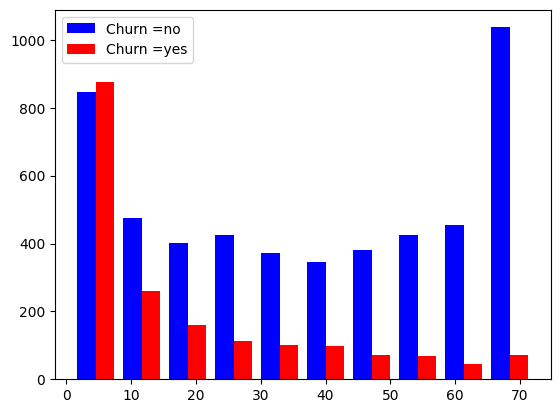

In [127]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


#grafico analise de tenure
#    tenure--> quantidade de meses q o cliente ta na empresa

dfno =df[df.Churn=='No'].tenure
dfyes =df[df.Churn=='Yes'].tenure

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])

plt.legend()

#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

plt.savefig("graph Churn-churn.png")

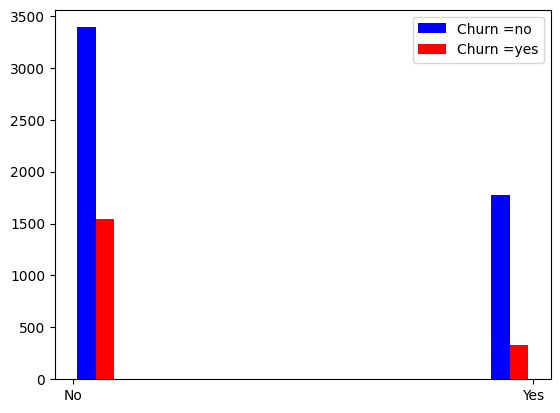

In [128]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].Dependents
dfyes =df[df.Churn=='Yes'].Dependents

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()

#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━



plt.savefig("graph churn-dep .png")

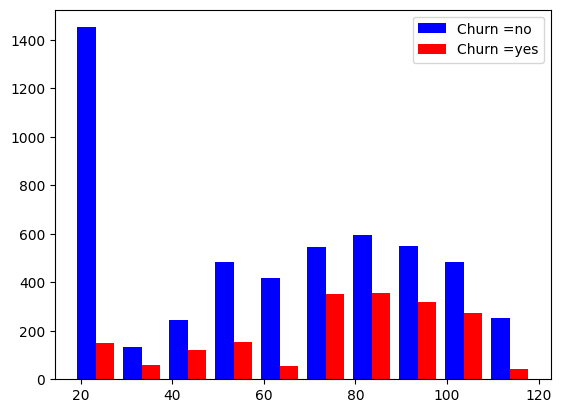

In [129]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Graficos
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].MonthlyCharges	
dfyes =df[df.Churn=='Yes'].MonthlyCharges	

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()


#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#        Salvando Relatório
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

plt.savefig("graph churn-MC.png")

No: 5163 Yes: 1869  % No: gender              100.0
SeniorCitizen       100.0
Partner             100.0
Dependents          100.0
tenure              100.0
PhoneService        100.0
MultipleLines       100.0
InternetService     100.0
OnlineSecurity      100.0
OnlineBackup        100.0
DeviceProtection    100.0
TechSupport         100.0
StreamingTV         100.0
StreamingMovies     100.0
Contract            100.0
PaperlessBilling    100.0
PaymentMethod       100.0
MonthlyCharges      100.0
TotalCharges        100.0
Churn               100.0
dtype: float64


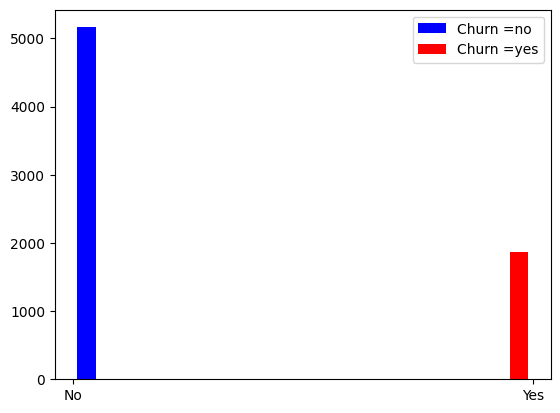

In [130]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#    balanceamento do dataset
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

dfno =df[df.Churn=='No'].Churn	
dfyes =df[df.Churn=='Yes'].Churn

total =dfno.count() +dfyes.count()
percent =round((df.count() /total)*100, 2)

print(f'No: {dfno.count()}',f'Yes: {dfyes.count()}', f' % No: {percent}')

#Plotagem

plt.hist([dfno, dfyes], color=['blue','red'],label=['Churn =no', 'Churn =yes'])
plt.legend()

In [131]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#    padronizando multiplanelines
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

for i in df:
  if df[i].dtypes =='object':
    print(f'{i} : {df[i].unique()}')
    
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [132]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#       Mudando para Números
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

# Continuar usando dfnum para outras operações, caso necessário
dfnum = pd.get_dummies(data=df, columns=['gender', 'InternetService', 'Partner', 'Dependents', 'PhoneService',
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling', 'PaymentMethod'])





In [133]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#           label encoder
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

le =LabelEncoder()
dfnum['Churn'] =le.fit_transform(dfnum['Churn'])
dfnum.Churn.sample(15)

3446    0
3043    1
4824    0
802     0
952     0
6729    0
2126    0
5293    0
2349    0
6869    1
6017    0
2405    1
6350    0
5204    0
2544    0
Name: Churn, dtype: int32

In [134]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Ajuste de Escala
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

scaler =MinMaxScaler()
dfnum[['tenure', 'MonthlyCharges', 'TotalCharges']] =scaler.fit_transform(dfnum[['tenure', 'MonthlyCharges', 'TotalCharges']])

dfnum.sample(5)



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2084,0,0.000000,0.512438,0.005879,1,False,True,False,True,False,...,False,True,False,False,True,False,True,False,False,False
1926,0,0.676056,0.811443,0.560080,1,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False
877,0,0.704225,0.416915,0.352896,0,True,False,True,False,False,...,True,False,True,False,True,False,True,False,False,False
3623,1,0.507042,0.537313,0.295021,0,False,True,False,True,False,...,False,True,False,False,False,True,True,False,False,False
2296,1,0.000000,0.268159,0.003046,0,False,True,True,False,False,...,False,True,False,False,True,False,False,False,True,False


In [135]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#     separar features e labels
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

features =dfnum.drop('Churn', axis=1)
labels =dfnum['Churn']



In [136]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#             Validação
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

val =features.head(15)
val

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,True,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0,0.464789,0.385075,0.215867,False,True,True,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,0.014085,0.354229,0.010310,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,0.619718,0.239303,0.210241,False,True,True,False,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,0.014085,0.521891,0.015330,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
5,0,0.098592,0.809950,0.092511,True,False,False,True,False,True,...,True,True,False,False,False,True,False,False,True,False
6,0,0.295775,0.704975,0.222779,False,True,False,True,False,True,...,False,True,False,False,False,True,False,True,False,False
7,0,0.126761,0.114428,0.032668,True,False,True,False,False,True,...,False,True,False,False,True,False,False,False,False,True
8,0,0.380282,0.861194,0.349325,True,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,False
9,0,0.859155,0.377114,0.400317,False,True,True,False,False,True,...,False,False,True,False,True,False,True,False,False,False


In [137]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#           Nova Feature
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

# Separação de features e labels
features =features.iloc[10:]
label =labels.iloc[10:]


In [138]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#       Corrigindo labels
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

# Supondo que features e labels são arrays NumPy
features = np.array(features)
labels = np.array(labels)

# Removendo as últimas 10 linhas de labels
labels = labels[:-10]

# Agora features e labels devem ter o mesmo tamanho
print("Número de amostras em features:", len(features))
print("Número de amostras em labels:", len(labels))


Número de amostras em features: 7022
Número de amostras em labels: 7022


In [139]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Treino & Teste
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━



X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)

(5617, 41) (5617,)


In [140]:


model =Sequential([Dense(20, input_shape=(41,), activation ='relu'),
                   Dense(52, activation='relu'),
                   Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])



C:\Users\pytho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [141]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#            Treinamento
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

#━━━━━━━━━━━━━━━❮Treinamento do Modelo❯━━━━━━━━━━━━━━━━

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')


history =model.fit(X_train, y_train, epochs=100)



Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.6998 - loss: 0.6107
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.7221 - loss: 0.5936
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7246 - loss: 0.5877
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.7400 - loss: 0.5690
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.7226 - loss: 0.5903
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7253 - loss: 0.5830
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.7330 - loss: 0.5725
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.7229 - loss: 0.5800
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.7208 - loss: 0.5824
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.7236 - loss: 0.5830
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.7363 - loss: 0.5661
Epoch 12/100
176/17

In [145]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#            Predição
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━



pred_val = model.predict(val)
print(pred_val)

# Aqui estamos assumindo que pred_val é um array de labels categóricos ('Yes', 'No')
# Vamos mapear essas strings para valores numéricos para compatibilidade com outras operações se necessário
y_pred = [1 if label == 'Yes' else 0 for label in pred_val]




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.6286908 ]
 [0.28573662]
 [0.709332  ]
 [0.50908387]
 [0.3926005 ]
 [0.14272864]
 [0.19454071]
 [0.2888984 ]
 [0.4608503 ]
 [0.19063462]
 [0.15384279]
 [0.21400744]
 [0.6579888 ]
 [0.09167545]
 [0.6913901 ]]


In [146]:
print(len(cliente))
print(len(real))
print(len(y_pred))
# Cortando y_pred para ter apenas os primeiros 10 elementos


# Criando o DataFrame novamente com as colunas ajustadas



10
10
15


,cliente,real,pred
0,7590-VHVEG,No,0
1,5575-GNVDE,No,0
2,3668-QPYBK,Yes,0
3,7795-CFOCW,No,0
4,9237-HQITU,Yes,0
5,9305-CDSKC,Yes,0
6,1452-KIOVK,No,0
7,6713-OKOMC,No,0
8,7892-POOKP,Yes,0
9,6388-TABGU,No,0


In [149]:
# print(df['real'].value_counts())
# print(df['churn'].value_counts())
# print(df.head())

# print('0-'*12)
# print(df.columns)

# df.head(5)


y_pred =[]



for i in pred_val:
  if i >0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
  
y_pred = y_pred[:10]


cliente =df_val['customerID']
real =df_val['Churn']
df =pd.DataFrame({'cliente': cliente, 'real': real, 'pred': y_pred})

display(df)


,cliente,real,pred
0,7590-VHVEG,No,1
1,5575-GNVDE,No,0
2,3668-QPYBK,Yes,1
3,7795-CFOCW,No,1
4,9237-HQITU,Yes,0
5,9305-CDSKC,Yes,0
6,1452-KIOVK,No,0
7,6713-OKOMC,No,0
8,7892-POOKP,Yes,0
9,6388-TABGU,No,0


In [150]:
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
#         Matriz de confusão
#━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━



# Suponha que df já tenha sido criado com as colunas 'real' e 'churn'
matrix_cnf = pd.crosstab(df['real'], df['churn'], rownames=['Real'], colnames=['Churn'])

# Verificando se a matriz de confusão é vazia
if matrix_cnf.size == 0:
    print("A matriz de confusão está vazia. Verifique os dados de entrada.")
else:
    sns.heatmap(matrix_cnf, annot=True)
    plt.savefig("matrix_cnf.png")
    plt.show()



# df =pd.DataFrame(df, columns=['real', 'churn'])
# matrix_cnf =pd.crosstab(df['real'], df['churn'], rownames=['real'], colnames=['churns'])

# sns.heatmap(matrix_cnf, annot=True).figure.savefig("matrix cnf.png")

KeyError: 'churn'

In [ ]:
# #━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
# #        Arrumando Data
# #━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

# data =str(datetime.date.today())

# dia =data[8:]
# mes =data[5:7]
# ano =data[:4]


# relt ='Relatório Churn {}-{}-{}'.format(dia, mes,ano)

In [ ]:
# #━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━
# #             Relatório
# #━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


# #━━━━━━━━❮Abrindo Arquivo❯━━━━━━━━━
# arquivo =Document()
# #━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


# #━━━━━━━━━━━━━❮Titulo❯━━━━━━━━━━━━━
# arquivo.add_heading("Relatório de Churn                {}/{}/{}".format(dia, mes,ano), 0)
# arquivo.add_paragraph('')
# #━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

# #━━━━━━━━━━━━━❮Briefing❯━━━━━━━━━━━━━

# arquivo.add_paragraph('Este relatório foi feito de forma automática e visa auxiliar a tomada de decisão em relação a área de vendas e marketing da empresa.')
# arquivo.add_paragraph('                                                                Documento realizado pelo software Ragnar, de autoria da SettLink')
# arquivo.add_paragraph('')


# arquivo.add_page_break()

# #━━━━━━━━❮Análise Gráfica 01❯━━━━━━━━━
# arquivo.add_paragraph('───────────────────≪Análise Gráfica Inicial≫──────────────────')
# arquivo.add_paragraph('')

# arquivo.add_paragraph('')
# arquivo.add_paragraph('Segundo as nossas análises, o tempo de permanencia do cliente é crucial para a fidelização do cliente, pois quanto mais tempo ele fica na empresa, menor a chance de churn.')
# arquivo.add_paragraph('*Gráfico citado abaixo*')


# arquivo.add_picture("graph Churn-churn.png")

# #━━━━━━━━━━━━━━━❮Análise Gráfica 02❯━━━━━━━━━━━━━━━━
# arquivo.add_paragraph('')
# arquivo.add_paragraph('É possível ver também que não faz diferença se o responsável pelo plano tem algum dependente.')
# arquivo.add_paragraph('*Gráfico citado abaixo*')

# arquivo.add_picture("graph churn-dep .png")

# #━━━━━━━━━━━━━━━❮Análise Gráfica 03❯━━━━━━━━━━━━━━━━
# arquivo.add_paragraph('')
# arquivo.add_paragraph('Os clientes com planos de US$80 -- US$100, tendem a serem menor convertidos no longo prazo.')
# arquivo.add_paragraph('*Gráfico citado abaixo*')

# arquivo.add_picture("graph churn-MC.png")


# #━━━━━━━━━━━━━━━❮Análise Gráfica 04❯━━━━━━━━━━━━━━━━
# arquivo.add_paragraph('')
# arquivo.add_paragraph('Considerando estes fatores, é possível entender que a empresa teria uma maior fidelização de clientes se oferecessem mais vantagens nos planos de US$80 -- US$100.')
# arquivo.add_paragraph('Além disso, é muito importante melhorar as vantagens dos clientes logo no começo de sua experiência, pois é no começo que ocorre a maior perda de clientes da empresa')

# arquivo.add_paragraph('*Gráfico citado abaixo*')

# arquivo.add_picture("matrix cnf.png")







# #━━━━━━━━❮Fechando Arquivo❯━━━━━━━━━
# arquivo.save(f'{relt}.docx')

# #files.download('{}.docx'.format(relt))
# #━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━


# doc = aw.Document(f'{relt}.docx')
# doc.save(f"{relt}.pdf")




In [ ]:
# #━━━━━━━━━❮Fecha Arquivo❯━━━━━━━━━
# def fechaarq():
#     os.remove("graph Churn-churn.png")
#     os.remove("graph churn-dep .png")
#     os.remove("graph churn-MC.png")
#     os.remove('matrix cnf.png')
#     os.remove(f'{relt}.docx')
#     os.remove(f'{relt}.pdf')
#     os.remove(f'Secure_{relt}.pdf')
#     print('200')

In [ ]:
# #━━━━━━❮Adicionando Segurança❯━━━━━━━
# def secpdf(file, password):
#     parser =PdfFileWriter()
#     pdf =PdfFileReader(f"{relt}.pdf")
#     for page in range(pdf.numPages):
#         parser.addPage(pdf.getPage(page))
#     parser.encrypt(password)
    
#     with open(f'Secure_{relt}.pdf', 'wb') as f:
#         parser.write(f)
#         f.close()
#     print(f'Secure_{relt} Created...')
    
# if __name__ == "__main__":
#     file =sys.argv[1]
#     secpdf(file, password)
    
        

Secure_Relatório Churn 01-11-2022 Created...


In [ ]:
# #━━━━━━━━❮envio do Email❯━━━━━━━━━
# def enviar_email():
#     time.sleep(1)
#     body = f"""
#     Segue o {relt}
    
#     A SettLink agradece a preferência, conte conosco sobre qualquer duvida!
#     """

#     sender = 'settlinksp@gmail.com'
#     password = 'jmolibocyyhmgqxv'
#     receiver = email


#     message = MIMEMultipart()
#     message['From'] = sender
#     message['To'] = receiver
#     message['Subject'] = relt

#     message.attach(MIMEText(body, 'plain'))

#     pdfname = f'Secure_{relt}.pdf'


#     binary_pdf = open(pdfname, 'rb')

#     payload = MIMEBase('application', 'octate-stream', Name=pdfname)
#     payload.set_payload((binary_pdf).read())

#     encoders.encode_base64(payload)

#     payload.add_header('Content-Decomposition', 'attachment', filename=pdfname)
#     message.attach(payload)

#     session = smtplib.SMTP('smtp.gmail.com', 587)

#     session.starttls()

#     session.login(sender, password)

#     text = message.as_string()
#     session.sendmail(sender, receiver, text)
#     session.quit()
#     print('200')
# #━━━━━━━━━━━━━━━❮◆❯━━━━━━━━━━━━━━━━

In [ ]:
# #━━━━━━❮Execução das funções❯━━━━━━━
# enviar_email()
# fechaarq()

200


In [ ]:
#━━━━━━❮Salvando Modelo❯━━━━━━━
joblib.dump(rf_model, 'model_CH')

['model']

In [ ]:
pandas_profiling.ProfileReport(df)